In [1010]:
import pandas as pd
from sklearn.impute import SimpleImputer
import plotly.express as ply
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import numpy as np
import xgboost as xgb
import pickle

In [925]:
df = pd.read_csv('final_data_turbo.csv', index_col='Unnamed: 0')
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb
0,Bakı,Hyundai,Sonata,2014,Sedan,Qara,2.4 L/178 a.g./Benzin,123 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",23 900 AZN,5.0,1.0,Avropa
1,Bakı,Fiat,Fiorino,2022,Minivan,Ağ,1.4 L/77 a.g./Qaz,0 km,Mexaniki,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",30 400 AZN,5.0,1.0,Avropa
2,Bakı,Lexus,ES 300h,2022,Sedan,Ağ,2.5 L/215 a.g./Hibrid,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",63 500 USD,5.0,1.0,Avropa
3,Bakı,Nissan,Tiida,2012,Hetçbek,Qızılı,1.5 L/110 a.g./Benzin,36 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",14 300 AZN,5.0,1.0,Yaponiya
4,Bakı,BMW,520,2014,Sedan,Ağ,2.0 L/245 a.g./Benzin,126 500 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",38 500 AZN,4.0,1.0,Rəsmi diler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,Bakı,BMW,520,2018,Sedan,Yaş Asfalt,2.0 L/184 a.g./Benzin,33 000 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",36 500 USD,NaN,0,Avropa
17141,Bakı,Land Rover,Discovery,2017,Offroader / SUV,Ağ,3.0 L/340 a.g./Benzin,59 800 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",41 500 USD,7,1,Amerika
17142,Sumqayıt,Bajaj,Pulsar RS 200,2016,Motosiklet,Sarı,0.2 L/22 a.g./Benzin,50 000 km,Mexaniki,Arxa,Xeyr,"Vuruğu var, rənglənməyib",3 500 AZN,2,3,Rəsmi diler
17143,Bakı,Mercedes,C 180,1995,Sedan,Qara,1.8 L/122 a.g./Benzin,452 134 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",6 500 AZN,NaN,NaN,NaN


In [926]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17145 entries, 0 to 17144
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Şəhər                     17145 non-null  object
 1   Marka                     17145 non-null  object
 2   Model                     17145 non-null  object
 3   Buraxılış ili             17145 non-null  int64 
 4   Ban növü                  17145 non-null  object
 5   Rəng                      17145 non-null  object
 6   Mühərrik                  17145 non-null  object
 7   Yürüş                     17145 non-null  object
 8   Sürətlər qutusu           17145 non-null  object
 9   Ötürücü                   17145 non-null  object
 10  Yeni                      17145 non-null  object
 11  Vəziyyəti                 17130 non-null  object
 12  Qiyməti                   17145 non-null  object
 13  Yerlərin sayı             14823 non-null  object
 14  Sahiblər                  1

In [927]:
df.nunique()
df.drop_duplicates(inplace=True)

In [928]:
for i in df.columns:
    print(df[i], '\n', df[i].unique())
    

0            Bakı
1            Bakı
2            Bakı
3            Bakı
4            Bakı
           ...   
17140        Bakı
17141        Bakı
17142    Sumqayıt
17143        Bakı
17144        Bakı
Name: Şəhər, Length: 17145, dtype: object 
 ['Bakı' 'Lənkəran' 'Sumqayıt' 'Goranboy' 'Salyan' 'Zaqatala' 'Gəncə'
 'Şirvan' 'Naxçıvan' 'Cəlilabad' 'Balakən' 'Qəbələ' 'Qazax' 'Xırdalan'
 'Ağcabədi' 'Xaçmaz' 'Masallı' 'Ağdaş' 'Oğuz' 'Şəmkir' 'Quba' 'Tovuz'
 'Şəki' 'Tərtər' 'Hacıqabul' 'Bərdə' 'Qusar' 'Mingəçevir' 'Şamaxı'
 'Sabirabad' 'Ağstafa' 'Ucar' 'Neftçala' 'İmişli' 'Yevlax' 'Saatlı'
 'Siyəzən' 'Qax' 'Kürdəmir' 'Füzuli' 'Ağsu' 'Göygöl' 'İsmayıllı' 'Göyçay'
 'Astara' 'Biləsuvar' 'Zərdab' 'Qobustan' 'Naftalan' 'Beyləqan'
 'Dəliməmmədli' 'Gədəbəy' 'Ağdam' 'Xızı' 'Samux' 'Şabran' 'Xudat'
 'Yardımlı' 'Babək' 'Şərur' 'Ordubad' 'Lerik' 'Cəbrayıl' 'Daşkəsən']
0           Hyundai
1              Fiat
2             Lexus
3            Nissan
4               BMW
            ...    
17140           BMW


In [929]:
for i in df.columns:
    print(i)

Şəhər
Marka
Model
Buraxılış ili
Ban növü
Rəng
Mühərrik
Yürüş
Sürətlər qutusu
Ötürücü
Yeni
Vəziyyəti
Qiyməti
Yerlərin sayı
Sahiblər
Hansı bazar üçün yığılıb


In [930]:
df.Şəhər.unique()

array(['Bakı', 'Lənkəran', 'Sumqayıt', 'Goranboy', 'Salyan', 'Zaqatala',
       'Gəncə', 'Şirvan', 'Naxçıvan', 'Cəlilabad', 'Balakən', 'Qəbələ',
       'Qazax', 'Xırdalan', 'Ağcabədi', 'Xaçmaz', 'Masallı', 'Ağdaş',
       'Oğuz', 'Şəmkir', 'Quba', 'Tovuz', 'Şəki', 'Tərtər', 'Hacıqabul',
       'Bərdə', 'Qusar', 'Mingəçevir', 'Şamaxı', 'Sabirabad', 'Ağstafa',
       'Ucar', 'Neftçala', 'İmişli', 'Yevlax', 'Saatlı', 'Siyəzən', 'Qax',
       'Kürdəmir', 'Füzuli', 'Ağsu', 'Göygöl', 'İsmayıllı', 'Göyçay',
       'Astara', 'Biləsuvar', 'Zərdab', 'Qobustan', 'Naftalan',
       'Beyləqan', 'Dəliməmmədli', 'Gədəbəy', 'Ağdam', 'Xızı', 'Samux',
       'Şabran', 'Xudat', 'Yardımlı', 'Babək', 'Şərur', 'Ordubad',
       'Lerik', 'Cəbrayıl', 'Daşkəsən'], dtype=object)

In [931]:
df.drop_duplicates(inplace = True)

In [932]:
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb
0,Bakı,Hyundai,Sonata,2014,Sedan,Qara,2.4 L/178 a.g./Benzin,123 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",23 900 AZN,5.0,1.0,Avropa
1,Bakı,Fiat,Fiorino,2022,Minivan,Ağ,1.4 L/77 a.g./Qaz,0 km,Mexaniki,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",30 400 AZN,5.0,1.0,Avropa
2,Bakı,Lexus,ES 300h,2022,Sedan,Ağ,2.5 L/215 a.g./Hibrid,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",63 500 USD,5.0,1.0,Avropa
3,Bakı,Nissan,Tiida,2012,Hetçbek,Qızılı,1.5 L/110 a.g./Benzin,36 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",14 300 AZN,5.0,1.0,Yaponiya
4,Bakı,BMW,520,2014,Sedan,Ağ,2.0 L/245 a.g./Benzin,126 500 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",38 500 AZN,4.0,1.0,Rəsmi diler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,Bakı,BMW,520,2018,Sedan,Yaş Asfalt,2.0 L/184 a.g./Benzin,33 000 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",36 500 USD,NaN,0,Avropa
17141,Bakı,Land Rover,Discovery,2017,Offroader / SUV,Ağ,3.0 L/340 a.g./Benzin,59 800 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",41 500 USD,7,1,Amerika
17142,Sumqayıt,Bajaj,Pulsar RS 200,2016,Motosiklet,Sarı,0.2 L/22 a.g./Benzin,50 000 km,Mexaniki,Arxa,Xeyr,"Vuruğu var, rənglənməyib",3 500 AZN,2,3,Rəsmi diler
17143,Bakı,Mercedes,C 180,1995,Sedan,Qara,1.8 L/122 a.g./Benzin,452 134 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",6 500 AZN,NaN,NaN,NaN


In [933]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17145 entries, 0 to 17144
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Şəhər                     17145 non-null  object
 1   Marka                     17145 non-null  object
 2   Model                     17145 non-null  object
 3   Buraxılış ili             17145 non-null  int64 
 4   Ban növü                  17145 non-null  object
 5   Rəng                      17145 non-null  object
 6   Mühərrik                  17145 non-null  object
 7   Yürüş                     17145 non-null  object
 8   Sürətlər qutusu           17145 non-null  object
 9   Ötürücü                   17145 non-null  object
 10  Yeni                      17145 non-null  object
 11  Vəziyyəti                 17130 non-null  object
 12  Qiyməti                   17145 non-null  object
 13  Yerlərin sayı             14823 non-null  object
 14  Sahiblər                  1

In [934]:
df[['Muherrik', 'At_gucu', 'Yanacaq']] = df['Mühərrik'].str.split('/',expand = True)
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq
0,Bakı,Hyundai,Sonata,2014,Sedan,Qara,2.4 L/178 a.g./Benzin,123 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",23 900 AZN,5.0,1.0,Avropa,2.4 L,178 a.g.,Benzin
1,Bakı,Fiat,Fiorino,2022,Minivan,Ağ,1.4 L/77 a.g./Qaz,0 km,Mexaniki,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",30 400 AZN,5.0,1.0,Avropa,1.4 L,77 a.g.,Qaz
2,Bakı,Lexus,ES 300h,2022,Sedan,Ağ,2.5 L/215 a.g./Hibrid,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",63 500 USD,5.0,1.0,Avropa,2.5 L,215 a.g.,Hibrid
3,Bakı,Nissan,Tiida,2012,Hetçbek,Qızılı,1.5 L/110 a.g./Benzin,36 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",14 300 AZN,5.0,1.0,Yaponiya,1.5 L,110 a.g.,Benzin
4,Bakı,BMW,520,2014,Sedan,Ağ,2.0 L/245 a.g./Benzin,126 500 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",38 500 AZN,4.0,1.0,Rəsmi diler,2.0 L,245 a.g.,Benzin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,Bakı,BMW,520,2018,Sedan,Yaş Asfalt,2.0 L/184 a.g./Benzin,33 000 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",36 500 USD,NaN,0,Avropa,2.0 L,184 a.g.,Benzin
17141,Bakı,Land Rover,Discovery,2017,Offroader / SUV,Ağ,3.0 L/340 a.g./Benzin,59 800 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",41 500 USD,7,1,Amerika,3.0 L,340 a.g.,Benzin
17142,Sumqayıt,Bajaj,Pulsar RS 200,2016,Motosiklet,Sarı,0.2 L/22 a.g./Benzin,50 000 km,Mexaniki,Arxa,Xeyr,"Vuruğu var, rənglənməyib",3 500 AZN,2,3,Rəsmi diler,0.2 L,22 a.g.,Benzin
17143,Bakı,Mercedes,C 180,1995,Sedan,Qara,1.8 L/122 a.g./Benzin,452 134 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",6 500 AZN,NaN,NaN,NaN,1.8 L,122 a.g.,Benzin


In [935]:
df = df.drop(columns = 'Mühərrik')
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq
0,Bakı,Hyundai,Sonata,2014,Sedan,Qara,123 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",23 900 AZN,5.0,1.0,Avropa,2.4 L,178 a.g.,Benzin
1,Bakı,Fiat,Fiorino,2022,Minivan,Ağ,0 km,Mexaniki,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",30 400 AZN,5.0,1.0,Avropa,1.4 L,77 a.g.,Qaz
2,Bakı,Lexus,ES 300h,2022,Sedan,Ağ,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",63 500 USD,5.0,1.0,Avropa,2.5 L,215 a.g.,Hibrid
3,Bakı,Nissan,Tiida,2012,Hetçbek,Qızılı,36 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",14 300 AZN,5.0,1.0,Yaponiya,1.5 L,110 a.g.,Benzin
4,Bakı,BMW,520,2014,Sedan,Ağ,126 500 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",38 500 AZN,4.0,1.0,Rəsmi diler,2.0 L,245 a.g.,Benzin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,Bakı,BMW,520,2018,Sedan,Yaş Asfalt,33 000 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",36 500 USD,NaN,0,Avropa,2.0 L,184 a.g.,Benzin
17141,Bakı,Land Rover,Discovery,2017,Offroader / SUV,Ağ,59 800 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",41 500 USD,7,1,Amerika,3.0 L,340 a.g.,Benzin
17142,Sumqayıt,Bajaj,Pulsar RS 200,2016,Motosiklet,Sarı,50 000 km,Mexaniki,Arxa,Xeyr,"Vuruğu var, rənglənməyib",3 500 AZN,2,3,Rəsmi diler,0.2 L,22 a.g.,Benzin
17143,Bakı,Mercedes,C 180,1995,Sedan,Qara,452 134 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",6 500 AZN,NaN,NaN,NaN,1.8 L,122 a.g.,Benzin


In [936]:
# df['Yürüş'] = df['Yürüş'].str.replace('km', '')
# df.info()
#df['Yürüş'] = df['Yürüş'].str.replace(' ', '').astype('int')




In [937]:
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq
0,Bakı,Hyundai,Sonata,2014,Sedan,Qara,123 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",23 900 AZN,5.0,1.0,Avropa,2.4 L,178 a.g.,Benzin
1,Bakı,Fiat,Fiorino,2022,Minivan,Ağ,0 km,Mexaniki,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",30 400 AZN,5.0,1.0,Avropa,1.4 L,77 a.g.,Qaz
2,Bakı,Lexus,ES 300h,2022,Sedan,Ağ,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",63 500 USD,5.0,1.0,Avropa,2.5 L,215 a.g.,Hibrid
3,Bakı,Nissan,Tiida,2012,Hetçbek,Qızılı,36 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",14 300 AZN,5.0,1.0,Yaponiya,1.5 L,110 a.g.,Benzin
4,Bakı,BMW,520,2014,Sedan,Ağ,126 500 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",38 500 AZN,4.0,1.0,Rəsmi diler,2.0 L,245 a.g.,Benzin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,Bakı,BMW,520,2018,Sedan,Yaş Asfalt,33 000 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",36 500 USD,NaN,0,Avropa,2.0 L,184 a.g.,Benzin
17141,Bakı,Land Rover,Discovery,2017,Offroader / SUV,Ağ,59 800 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",41 500 USD,7,1,Amerika,3.0 L,340 a.g.,Benzin
17142,Sumqayıt,Bajaj,Pulsar RS 200,2016,Motosiklet,Sarı,50 000 km,Mexaniki,Arxa,Xeyr,"Vuruğu var, rənglənməyib",3 500 AZN,2,3,Rəsmi diler,0.2 L,22 a.g.,Benzin
17143,Bakı,Mercedes,C 180,1995,Sedan,Qara,452 134 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",6 500 AZN,NaN,NaN,NaN,1.8 L,122 a.g.,Benzin


In [938]:
if 'AZN' in df['Qiyməti'].values:
    df['Qiyməti'] = df['Qiyməti'].apply(lambda x:x.replace('AZN', ''))
    df['Qiyməti'] = df['Qiyməti'].apply(lambda x:float(x.replace(' ', '')))

elif 'USD' in df['Qiyməti'].values:
    df['Qiyməti'] = df['Qiyməti'].apply(lambda x:x.replace(' USD', ''))
    df['Qiyməti'] = df['Qiyməti'].apply(lambda x:float(x.replace(' ', '')) * 1.7)
    
elif 'EUR' in df['Qiyməti'].values:
    df['Qiyməti'] = df['Qiyməti'].apply(lambda x:x.replace(' EUR', ''))
    df['Qiyməti'] = df['Qiyməti'].apply(lambda x:float(x.replace(' ', '')) * 1.8)

In [939]:
df['Qiyməti'] = df['Qiyməti'].apply(lambda x: float(x.replace('AZN', '').replace(' ','')) if 'AZN' in x else 
                    float(x.replace('USD', '').replace(' ',''))* 1.7 if "USD" in x else 
                    float(x.replace('EUR', '').replace(' ',''))* 1.8 if "EUR" in x else x)


In [940]:
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq
0,Bakı,Hyundai,Sonata,2014,Sedan,Qara,123 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",23900.0,5.0,1.0,Avropa,2.4 L,178 a.g.,Benzin
1,Bakı,Fiat,Fiorino,2022,Minivan,Ağ,0 km,Mexaniki,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",30400.0,5.0,1.0,Avropa,1.4 L,77 a.g.,Qaz
2,Bakı,Lexus,ES 300h,2022,Sedan,Ağ,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",107950.0,5.0,1.0,Avropa,2.5 L,215 a.g.,Hibrid
3,Bakı,Nissan,Tiida,2012,Hetçbek,Qızılı,36 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",14300.0,5.0,1.0,Yaponiya,1.5 L,110 a.g.,Benzin
4,Bakı,BMW,520,2014,Sedan,Ağ,126 500 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",38500.0,4.0,1.0,Rəsmi diler,2.0 L,245 a.g.,Benzin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,Bakı,BMW,520,2018,Sedan,Yaş Asfalt,33 000 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",62050.0,NaN,0,Avropa,2.0 L,184 a.g.,Benzin
17141,Bakı,Land Rover,Discovery,2017,Offroader / SUV,Ağ,59 800 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",70550.0,7,1,Amerika,3.0 L,340 a.g.,Benzin
17142,Sumqayıt,Bajaj,Pulsar RS 200,2016,Motosiklet,Sarı,50 000 km,Mexaniki,Arxa,Xeyr,"Vuruğu var, rənglənməyib",3500.0,2,3,Rəsmi diler,0.2 L,22 a.g.,Benzin
17143,Bakı,Mercedes,C 180,1995,Sedan,Qara,452 134 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",6500.0,NaN,NaN,NaN,1.8 L,122 a.g.,Benzin


In [941]:
df[['Veziyyeti', 'Renglenmesi']]= df['Vəziyyəti'].str.split(pat= ',',expand=True)
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq,Veziyyeti,Renglenmesi
0,Bakı,Hyundai,Sonata,2014,Sedan,Qara,123 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",23900.0,5.0,1.0,Avropa,2.4 L,178 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
1,Bakı,Fiat,Fiorino,2022,Minivan,Ağ,0 km,Mexaniki,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",30400.0,5.0,1.0,Avropa,1.4 L,77 a.g.,Qaz,Vuruğu yoxdur,rənglənməyib
2,Bakı,Lexus,ES 300h,2022,Sedan,Ağ,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",107950.0,5.0,1.0,Avropa,2.5 L,215 a.g.,Hibrid,Vuruğu yoxdur,rənglənməyib
3,Bakı,Nissan,Tiida,2012,Hetçbek,Qızılı,36 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",14300.0,5.0,1.0,Yaponiya,1.5 L,110 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
4,Bakı,BMW,520,2014,Sedan,Ağ,126 500 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",38500.0,4.0,1.0,Rəsmi diler,2.0 L,245 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,Bakı,BMW,520,2018,Sedan,Yaş Asfalt,33 000 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",62050.0,NaN,0,Avropa,2.0 L,184 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
17141,Bakı,Land Rover,Discovery,2017,Offroader / SUV,Ağ,59 800 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",70550.0,7,1,Amerika,3.0 L,340 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
17142,Sumqayıt,Bajaj,Pulsar RS 200,2016,Motosiklet,Sarı,50 000 km,Mexaniki,Arxa,Xeyr,"Vuruğu var, rənglənməyib",3500.0,2,3,Rəsmi diler,0.2 L,22 a.g.,Benzin,Vuruğu var,rənglənməyib
17143,Bakı,Mercedes,C 180,1995,Sedan,Qara,452 134 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",6500.0,NaN,NaN,NaN,1.8 L,122 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib


In [942]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17145 entries, 0 to 17144
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Şəhər                     17145 non-null  object 
 1   Marka                     17145 non-null  object 
 2   Model                     17145 non-null  object 
 3   Buraxılış ili             17145 non-null  int64  
 4   Ban növü                  17145 non-null  object 
 5   Rəng                      17145 non-null  object 
 6   Yürüş                     17145 non-null  object 
 7   Sürətlər qutusu           17145 non-null  object 
 8   Ötürücü                   17145 non-null  object 
 9   Yeni                      17145 non-null  object 
 10  Vəziyyəti                 17130 non-null  object 
 11  Qiyməti                   17145 non-null  float64
 12  Yerlərin sayı             14823 non-null  object 
 13  Sahiblər                  14183 non-null  object 
 14  Hansı bazar

In [943]:
df = df.drop(columns = 'Vəziyyəti')

In [944]:
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq,Veziyyeti,Renglenmesi
0,Bakı,Hyundai,Sonata,2014,Sedan,Qara,123 000 km,Avtomat,Ön,Xeyr,23900.0,5.0,1.0,Avropa,2.4 L,178 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
1,Bakı,Fiat,Fiorino,2022,Minivan,Ağ,0 km,Mexaniki,Ön,Bəli,30400.0,5.0,1.0,Avropa,1.4 L,77 a.g.,Qaz,Vuruğu yoxdur,rənglənməyib
2,Bakı,Lexus,ES 300h,2022,Sedan,Ağ,0 km,Avtomat,Ön,Bəli,107950.0,5.0,1.0,Avropa,2.5 L,215 a.g.,Hibrid,Vuruğu yoxdur,rənglənməyib
3,Bakı,Nissan,Tiida,2012,Hetçbek,Qızılı,36 000 km,Avtomat,Ön,Xeyr,14300.0,5.0,1.0,Yaponiya,1.5 L,110 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
4,Bakı,BMW,520,2014,Sedan,Ağ,126 500 km,Avtomat,Arxa,Xeyr,38500.0,4.0,1.0,Rəsmi diler,2.0 L,245 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,Bakı,BMW,520,2018,Sedan,Yaş Asfalt,33 000 km,Avtomat,Arxa,Xeyr,62050.0,NaN,0,Avropa,2.0 L,184 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
17141,Bakı,Land Rover,Discovery,2017,Offroader / SUV,Ağ,59 800 km,Avtomat,Tam,Xeyr,70550.0,7,1,Amerika,3.0 L,340 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
17142,Sumqayıt,Bajaj,Pulsar RS 200,2016,Motosiklet,Sarı,50 000 km,Mexaniki,Arxa,Xeyr,3500.0,2,3,Rəsmi diler,0.2 L,22 a.g.,Benzin,Vuruğu var,rənglənməyib
17143,Bakı,Mercedes,C 180,1995,Sedan,Qara,452 134 km,Avtomat,Arxa,Xeyr,6500.0,NaN,NaN,NaN,1.8 L,122 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib


In [945]:
df['Yürüş'] = df['Yürüş'].apply(lambda x:int(x.replace('km', '').replace(' ', '')))
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq,Veziyyeti,Renglenmesi
0,Bakı,Hyundai,Sonata,2014,Sedan,Qara,123000,Avtomat,Ön,Xeyr,23900.0,5.0,1.0,Avropa,2.4 L,178 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
1,Bakı,Fiat,Fiorino,2022,Minivan,Ağ,0,Mexaniki,Ön,Bəli,30400.0,5.0,1.0,Avropa,1.4 L,77 a.g.,Qaz,Vuruğu yoxdur,rənglənməyib
2,Bakı,Lexus,ES 300h,2022,Sedan,Ağ,0,Avtomat,Ön,Bəli,107950.0,5.0,1.0,Avropa,2.5 L,215 a.g.,Hibrid,Vuruğu yoxdur,rənglənməyib
3,Bakı,Nissan,Tiida,2012,Hetçbek,Qızılı,36000,Avtomat,Ön,Xeyr,14300.0,5.0,1.0,Yaponiya,1.5 L,110 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
4,Bakı,BMW,520,2014,Sedan,Ağ,126500,Avtomat,Arxa,Xeyr,38500.0,4.0,1.0,Rəsmi diler,2.0 L,245 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,Bakı,BMW,520,2018,Sedan,Yaş Asfalt,33000,Avtomat,Arxa,Xeyr,62050.0,NaN,0,Avropa,2.0 L,184 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
17141,Bakı,Land Rover,Discovery,2017,Offroader / SUV,Ağ,59800,Avtomat,Tam,Xeyr,70550.0,7,1,Amerika,3.0 L,340 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
17142,Sumqayıt,Bajaj,Pulsar RS 200,2016,Motosiklet,Sarı,50000,Mexaniki,Arxa,Xeyr,3500.0,2,3,Rəsmi diler,0.2 L,22 a.g.,Benzin,Vuruğu var,rənglənməyib
17143,Bakı,Mercedes,C 180,1995,Sedan,Qara,452134,Avtomat,Arxa,Xeyr,6500.0,NaN,NaN,NaN,1.8 L,122 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib


In [946]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17145 entries, 0 to 17144
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Şəhər                     17145 non-null  object 
 1   Marka                     17145 non-null  object 
 2   Model                     17145 non-null  object 
 3   Buraxılış ili             17145 non-null  int64  
 4   Ban növü                  17145 non-null  object 
 5   Rəng                      17145 non-null  object 
 6   Yürüş                     17145 non-null  int64  
 7   Sürətlər qutusu           17145 non-null  object 
 8   Ötürücü                   17145 non-null  object 
 9   Yeni                      17145 non-null  object 
 10  Qiyməti                   17145 non-null  float64
 11  Yerlərin sayı             14823 non-null  object 
 12  Sahiblər                  14183 non-null  object 
 13  Hansı bazar üçün yığılıb  14640 non-null  object 
 14  Muherrik   

In [947]:
df['Yerlərin sayı']= df['Yerlərin sayı'].apply(lambda x: '9' if x == '8+' else x)
df['Yerlərin sayı'].unique()
df['Yerlərin sayı'] = df['Yerlərin sayı'].astype('float')






In [948]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17145 entries, 0 to 17144
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Şəhər                     17145 non-null  object 
 1   Marka                     17145 non-null  object 
 2   Model                     17145 non-null  object 
 3   Buraxılış ili             17145 non-null  int64  
 4   Ban növü                  17145 non-null  object 
 5   Rəng                      17145 non-null  object 
 6   Yürüş                     17145 non-null  int64  
 7   Sürətlər qutusu           17145 non-null  object 
 8   Ötürücü                   17145 non-null  object 
 9   Yeni                      17145 non-null  object 
 10  Qiyməti                   17145 non-null  float64
 11  Yerlərin sayı             14823 non-null  float64
 12  Sahiblər                  14183 non-null  object 
 13  Hansı bazar üçün yığılıb  14640 non-null  object 
 14  Muherrik   

In [949]:
df['Sahiblər']= df['Sahiblər'].apply(lambda x: '5' if x == '4 və daha çox' else x)
df['Sahiblər'].unique()
df['Sahiblər'] = df['Sahiblər'].astype('float')

In [950]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17145 entries, 0 to 17144
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Şəhər                     17145 non-null  object 
 1   Marka                     17145 non-null  object 
 2   Model                     17145 non-null  object 
 3   Buraxılış ili             17145 non-null  int64  
 4   Ban növü                  17145 non-null  object 
 5   Rəng                      17145 non-null  object 
 6   Yürüş                     17145 non-null  int64  
 7   Sürətlər qutusu           17145 non-null  object 
 8   Ötürücü                   17145 non-null  object 
 9   Yeni                      17145 non-null  object 
 10  Qiyməti                   17145 non-null  float64
 11  Yerlərin sayı             14823 non-null  float64
 12  Sahiblər                  14183 non-null  float64
 13  Hansı bazar üçün yığılıb  14640 non-null  object 
 14  Muherrik   

In [951]:
df['Muherrik'] = df['Muherrik'].apply(lambda x:float(x.replace('L', '').replace(' ', '')))


In [952]:
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq,Veziyyeti,Renglenmesi
0,Bakı,Hyundai,Sonata,2014,Sedan,Qara,123000,Avtomat,Ön,Xeyr,23900.0,5.0,1.0,Avropa,2.4,178 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
1,Bakı,Fiat,Fiorino,2022,Minivan,Ağ,0,Mexaniki,Ön,Bəli,30400.0,5.0,1.0,Avropa,1.4,77 a.g.,Qaz,Vuruğu yoxdur,rənglənməyib
2,Bakı,Lexus,ES 300h,2022,Sedan,Ağ,0,Avtomat,Ön,Bəli,107950.0,5.0,1.0,Avropa,2.5,215 a.g.,Hibrid,Vuruğu yoxdur,rənglənməyib
3,Bakı,Nissan,Tiida,2012,Hetçbek,Qızılı,36000,Avtomat,Ön,Xeyr,14300.0,5.0,1.0,Yaponiya,1.5,110 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
4,Bakı,BMW,520,2014,Sedan,Ağ,126500,Avtomat,Arxa,Xeyr,38500.0,4.0,1.0,Rəsmi diler,2.0,245 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,Bakı,BMW,520,2018,Sedan,Yaş Asfalt,33000,Avtomat,Arxa,Xeyr,62050.0,NaN,0.0,Avropa,2.0,184 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
17141,Bakı,Land Rover,Discovery,2017,Offroader / SUV,Ağ,59800,Avtomat,Tam,Xeyr,70550.0,7.0,1.0,Amerika,3.0,340 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib
17142,Sumqayıt,Bajaj,Pulsar RS 200,2016,Motosiklet,Sarı,50000,Mexaniki,Arxa,Xeyr,3500.0,2.0,3.0,Rəsmi diler,0.2,22 a.g.,Benzin,Vuruğu var,rənglənməyib
17143,Bakı,Mercedes,C 180,1995,Sedan,Qara,452134,Avtomat,Arxa,Xeyr,6500.0,NaN,NaN,NaN,1.8,122 a.g.,Benzin,Vuruğu yoxdur,rənglənməyib


In [953]:
df['At_gucu'] = df['At_gucu'].apply(lambda x:float(x.replace('a.g.', '').replace(' ', '')))

In [954]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17145 entries, 0 to 17144
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Şəhər                     17145 non-null  object 
 1   Marka                     17145 non-null  object 
 2   Model                     17145 non-null  object 
 3   Buraxılış ili             17145 non-null  int64  
 4   Ban növü                  17145 non-null  object 
 5   Rəng                      17145 non-null  object 
 6   Yürüş                     17145 non-null  int64  
 7   Sürətlər qutusu           17145 non-null  object 
 8   Ötürücü                   17145 non-null  object 
 9   Yeni                      17145 non-null  object 
 10  Qiyməti                   17145 non-null  float64
 11  Yerlərin sayı             14823 non-null  float64
 12  Sahiblər                  14183 non-null  float64
 13  Hansı bazar üçün yığılıb  14640 non-null  object 
 14  Muherrik   

In [955]:
imputer =SimpleImputer(strategy='most_frequent')
imputer2= SimpleImputer(strategy = 'mean')

df[['Hansı bazar üçün yığılıb', 'Veziyyeti', 'Renglenmesi' ]] = imputer.fit_transform(df[['Hansı bazar üçün yığılıb', 'Veziyyeti', 'Renglenmesi' ]])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17145 entries, 0 to 17144
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Şəhər                     17145 non-null  object 
 1   Marka                     17145 non-null  object 
 2   Model                     17145 non-null  object 
 3   Buraxılış ili             17145 non-null  int64  
 4   Ban növü                  17145 non-null  object 
 5   Rəng                      17145 non-null  object 
 6   Yürüş                     17145 non-null  int64  
 7   Sürətlər qutusu           17145 non-null  object 
 8   Ötürücü                   17145 non-null  object 
 9   Yeni                      17145 non-null  object 
 10  Qiyməti                   17145 non-null  float64
 11  Yerlərin sayı             14823 non-null  float64
 12  Sahiblər                  14183 non-null  float64
 13  Hansı bazar üçün yığılıb  17145 non-null  object 
 14  Muherrik   

In [956]:
df[['Yerlərin sayı', 'Sahiblər']] = imputer2.fit_transform(df[['Yerlərin sayı', 'Sahiblər']])
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq,Veziyyeti,Renglenmesi
0,Bakı,Hyundai,Sonata,2014,Sedan,Qara,123000,Avtomat,Ön,Xeyr,23900.0,5.000000,1.000000,Avropa,2.4,178.0,Benzin,Vuruğu yoxdur,rənglənməyib
1,Bakı,Fiat,Fiorino,2022,Minivan,Ağ,0,Mexaniki,Ön,Bəli,30400.0,5.000000,1.000000,Avropa,1.4,77.0,Qaz,Vuruğu yoxdur,rənglənməyib
2,Bakı,Lexus,ES 300h,2022,Sedan,Ağ,0,Avtomat,Ön,Bəli,107950.0,5.000000,1.000000,Avropa,2.5,215.0,Hibrid,Vuruğu yoxdur,rənglənməyib
3,Bakı,Nissan,Tiida,2012,Hetçbek,Qızılı,36000,Avtomat,Ön,Xeyr,14300.0,5.000000,1.000000,Yaponiya,1.5,110.0,Benzin,Vuruğu yoxdur,rənglənməyib
4,Bakı,BMW,520,2014,Sedan,Ağ,126500,Avtomat,Arxa,Xeyr,38500.0,4.000000,1.000000,Rəsmi diler,2.0,245.0,Benzin,Vuruğu yoxdur,rənglənməyib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,Bakı,BMW,520,2018,Sedan,Yaş Asfalt,33000,Avtomat,Arxa,Xeyr,62050.0,5.073332,0.000000,Avropa,2.0,184.0,Benzin,Vuruğu yoxdur,rənglənməyib
17141,Bakı,Land Rover,Discovery,2017,Offroader / SUV,Ağ,59800,Avtomat,Tam,Xeyr,70550.0,7.000000,1.000000,Amerika,3.0,340.0,Benzin,Vuruğu yoxdur,rənglənməyib
17142,Sumqayıt,Bajaj,Pulsar RS 200,2016,Motosiklet,Sarı,50000,Mexaniki,Arxa,Xeyr,3500.0,2.000000,3.000000,Rəsmi diler,0.2,22.0,Benzin,Vuruğu var,rənglənməyib
17143,Bakı,Mercedes,C 180,1995,Sedan,Qara,452134,Avtomat,Arxa,Xeyr,6500.0,5.073332,1.310936,Avropa,1.8,122.0,Benzin,Vuruğu yoxdur,rənglənməyib


In [957]:
df.isnull().sum()

Şəhər                       0
Marka                       0
Model                       0
Buraxılış ili               0
Ban növü                    0
Rəng                        0
Yürüş                       0
Sürətlər qutusu             0
Ötürücü                     0
Yeni                        0
Qiyməti                     0
Yerlərin sayı               0
Sahiblər                    0
Hansı bazar üçün yığılıb    0
Muherrik                    0
At_gucu                     0
Yanacaq                     0
Veziyyeti                   0
Renglenmesi                 0
dtype: int64

In [958]:
df.select_dtypes(include = 'object').nunique()
    

Şəhər                         64
Marka                        144
Model                       1175
Ban növü                      21
Rəng                          17
Sürətlər qutusu                4
Ötürücü                        3
Yeni                           2
Hansı bazar üçün yığılıb       9
Yanacaq                        6
Veziyyeti                      2
Renglenmesi                    2
dtype: int64

In [959]:
df['Şəhər'].unique()

array(['Bakı', 'Lənkəran', 'Sumqayıt', 'Goranboy', 'Salyan', 'Zaqatala',
       'Gəncə', 'Şirvan', 'Naxçıvan', 'Cəlilabad', 'Balakən', 'Qəbələ',
       'Qazax', 'Xırdalan', 'Ağcabədi', 'Xaçmaz', 'Masallı', 'Ağdaş',
       'Oğuz', 'Şəmkir', 'Quba', 'Tovuz', 'Şəki', 'Tərtər', 'Hacıqabul',
       'Bərdə', 'Qusar', 'Mingəçevir', 'Şamaxı', 'Sabirabad', 'Ağstafa',
       'Ucar', 'Neftçala', 'İmişli', 'Yevlax', 'Saatlı', 'Siyəzən', 'Qax',
       'Kürdəmir', 'Füzuli', 'Ağsu', 'Göygöl', 'İsmayıllı', 'Göyçay',
       'Astara', 'Biləsuvar', 'Zərdab', 'Qobustan', 'Naftalan',
       'Beyləqan', 'Dəliməmmədli', 'Gədəbəy', 'Ağdam', 'Xızı', 'Samux',
       'Şabran', 'Xudat', 'Yardımlı', 'Babək', 'Şərur', 'Ordubad',
       'Lerik', 'Cəbrayıl', 'Daşkəsən'], dtype=object)

In [960]:
baki_ve_etrafi = ['Bakı', 'Sumqayıt', 'Xırdalan']

cenub_bolgesi = [
    'Lənkəran', 'Masallı', 'Astara', 'Lerik', 'Biləsuvar',
    'Yardımlı', 'Salyan', 'Neftçala', 'Cəlilabad'
]

qerb_bolgesi = [
    'Gəncə', 'Şəmkir', 'Tovuz', 'Ağstafa', 'Qazax',
    'Göygöl', 'Bərdə', 'Ağdam', 'Tərtər', 'Samux',
    'Gədəbəy', 'Daşkəsən', 'Naftalan', 'Goranboy',
    'Mingəçevir', 'Şəmkir'
]

simal_qerb_bolgesi = [
    'Şəki', 'Qəbələ', 'Balakən', 'Zaqatala',
    'Qax', 'Oğuz'
]

simal_bolgesi = [
    'Xaçmaz', 'Quba', 'Qusar', 'Siyəzən',
    'Şabran', 'Xudat'
]

digər = [
    'Şirvan', 'Naxçıvan', 'Ağcabədi', 'Ağdaş',
    'Hacıqabul', 'Şamaxı', 'Sabirabad', 'Ucar',
    'İmişli', 'Yevlax', 'Saatlı', 'Kürdəmir',
    'Füzuli', 'Ağsu', 'İsmayıllı', 'Göyçay',
    'Zərdab', 'Qobustan', 'Beyləqan', 'Dəliməmmədli',
    'Xızı', 'Babək', 'Şərur', 'Ordubad',
    'Cəbrayıl', 'Cəlilabad', 'simal_bolgesi',
    'Masallı', 'Neftçala', 'Astara', 'Biləsuvar', 
    'Yardımlı', 'Lerik'
]


df['Şəhər'] = df['Şəhər'].apply(lambda x: 'baki_ve_etrafi' if x in baki_ve_etrafi else 
                  'qerb_bolgesi' if x in qerb_bolgesi else
                  'simal_qerb_bolgesi' if x in simal_qerb_bolgesi else
                  'simal_bolgesi' if x in simal_bolgesi else 
                  'digər' if x in digər  else x)
df['Şəhər'].unique()



array(['baki_ve_etrafi', 'Lənkəran', 'qerb_bolgesi', 'Salyan',
       'simal_qerb_bolgesi', 'digər', 'simal_bolgesi'], dtype=object)

In [961]:
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq,Veziyyeti,Renglenmesi
0,baki_ve_etrafi,Hyundai,Sonata,2014,Sedan,Qara,123000,Avtomat,Ön,Xeyr,23900.0,5.000000,1.000000,Avropa,2.4,178.0,Benzin,Vuruğu yoxdur,rənglənməyib
1,baki_ve_etrafi,Fiat,Fiorino,2022,Minivan,Ağ,0,Mexaniki,Ön,Bəli,30400.0,5.000000,1.000000,Avropa,1.4,77.0,Qaz,Vuruğu yoxdur,rənglənməyib
2,baki_ve_etrafi,Lexus,ES 300h,2022,Sedan,Ağ,0,Avtomat,Ön,Bəli,107950.0,5.000000,1.000000,Avropa,2.5,215.0,Hibrid,Vuruğu yoxdur,rənglənməyib
3,baki_ve_etrafi,Nissan,Tiida,2012,Hetçbek,Qızılı,36000,Avtomat,Ön,Xeyr,14300.0,5.000000,1.000000,Yaponiya,1.5,110.0,Benzin,Vuruğu yoxdur,rənglənməyib
4,baki_ve_etrafi,BMW,520,2014,Sedan,Ağ,126500,Avtomat,Arxa,Xeyr,38500.0,4.000000,1.000000,Rəsmi diler,2.0,245.0,Benzin,Vuruğu yoxdur,rənglənməyib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,baki_ve_etrafi,BMW,520,2018,Sedan,Yaş Asfalt,33000,Avtomat,Arxa,Xeyr,62050.0,5.073332,0.000000,Avropa,2.0,184.0,Benzin,Vuruğu yoxdur,rənglənməyib
17141,baki_ve_etrafi,Land Rover,Discovery,2017,Offroader / SUV,Ağ,59800,Avtomat,Tam,Xeyr,70550.0,7.000000,1.000000,Amerika,3.0,340.0,Benzin,Vuruğu yoxdur,rənglənməyib
17142,baki_ve_etrafi,Bajaj,Pulsar RS 200,2016,Motosiklet,Sarı,50000,Mexaniki,Arxa,Xeyr,3500.0,2.000000,3.000000,Rəsmi diler,0.2,22.0,Benzin,Vuruğu var,rənglənməyib
17143,baki_ve_etrafi,Mercedes,C 180,1995,Sedan,Qara,452134,Avtomat,Arxa,Xeyr,6500.0,5.073332,1.310936,Avropa,1.8,122.0,Benzin,Vuruğu yoxdur,rənglənməyib


In [962]:
# mean_cost = df.groupby('Hansı bazar üçün yığılıb')['Qiyməti'].mean()
# mean_cost

# fig = ply.line(mean_cost, x = mean_cost.index, y = mean_cost.values, title='Muxtelif bazarlara uygun qiymetler', markers=True)
# fig.show()

In [963]:
# df.corr()

In [964]:
object_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtypes == 'object':
        object_columns.append(i)
    else:
        numerical_columns.append(i)
        
print(object_columns)
print(numerical_columns)

['Şəhər', 'Marka', 'Model', 'Ban növü', 'Rəng', 'Sürətlər qutusu', 'Ötürücü', 'Yeni', 'Hansı bazar üçün yığılıb', 'Yanacaq', 'Veziyyeti', 'Renglenmesi']
['Buraxılış ili', 'Yürüş', 'Qiyməti', 'Yerlərin sayı', 'Sahiblər', 'Muherrik', 'At_gucu']


In [965]:
# Buraxılış ili, Yürüş, Muhərrik, At_gücü, Marka, Yeni, Ban növü, Şəhər
df['Marka'].unique()


array(['Hyundai', 'Fiat', 'Lexus', 'Nissan', 'BMW', 'Mercedes', 'Honda',
       'Toyota', 'Opel', 'Porsche', 'LADA (VAZ)', 'Changan', 'Haval',
       'Mitsubishi', 'Geely', 'Land Rover', 'Baic', 'Volkswagen',
       'Chevrolet', 'Maserati', 'Kia', 'Ford', 'Mercedes-Maybach', 'Audi',
       'GAZ', 'Dacia', 'Peugeot', 'Mazda', 'Alfa Romeo', 'Skywell',
       'Jetour', 'Genesis', 'Jeep', 'Subaru', 'Volvo', 'Isuzu', 'Ravon',
       'Ssang Yong', 'Hummer', 'Bentley', 'Renault', 'GMC', 'C.Moto',
       'Tufan', 'Khazar', 'Scania', 'Daewoo', 'Great Wall', 'FAW',
       'Tofas', 'Saipa', 'Shacman', 'KamAz', 'Moskvich', 'Chery', 'Haima',
       'Dodge', 'DFSK', 'Citroen', 'Lifan', 'Infiniti', 'Muravey', 'DAF',
       'Iran Khodro', 'SamAuto', 'Bestune', 'Jaguar', 'Cadillac',
       'Mondial', 'Lincoln', 'MG', 'Mini', 'DongFeng', 'Lamborghini',
       'Hongqi', 'ZX Auto', 'Bajaj', 'Yamaha', 'Skoda', 'Tesla', 'UAZ',
       'Suzuki', 'Foton', 'KAIYI', 'ZIL', 'Chrysler', 'Soueast', 'Wuling',
      

In [966]:
popular_brands = [
    'Hyundai', 'Fiat', 'Lexus', 'Nissan', 'BMW', 'Mercedes', 
    'Honda', 'Toyota', 'Opel', 'Porsche', 'Volkswagen', 
    'Chevrolet', 'Kia', 'Ford', 'Audi', 'Mazda', 'Jeep', 
    'Subaru', 'Volvo', 'Land Rover', 'Jaguar', 'Tesla', 
    'Mitsubishi', 'Mini', 'Peugeot', 'Skoda', 'Renault', 
    'Suzuki', 'Bentley', 'Lamborghini', 'Rolls-Royce'
]
df['Marka'] = df['Marka'].apply(lambda x: x if x in popular_brands else 'other')

In [967]:
a = [i for i in df.columns if i == 'Marka' ]

In [968]:
df[a]

,Marka
0,Hyundai
1,Fiat
2,Lexus
3,Nissan
4,BMW
...,...
17140,BMW
17141,Land Rover
17142,other
17143,Mercedes


In [969]:
df['Marka'].unique()

array(['Hyundai', 'Fiat', 'Lexus', 'Nissan', 'BMW', 'Mercedes', 'Honda',
       'Toyota', 'Opel', 'Porsche', 'other', 'Mitsubishi', 'Land Rover',
       'Volkswagen', 'Chevrolet', 'Kia', 'Ford', 'Audi', 'Peugeot',
       'Mazda', 'Jeep', 'Subaru', 'Volvo', 'Bentley', 'Renault', 'Jaguar',
       'Mini', 'Lamborghini', 'Skoda', 'Tesla', 'Suzuki', 'Rolls-Royce'],
      dtype=object)

In [970]:
# Buraxılış ili, Yürüş, Muherrik, At_gucu, Marka, Yeni, Ban növü, Şəhər
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq,Veziyyeti,Renglenmesi
0,baki_ve_etrafi,Hyundai,Sonata,2014,Sedan,Qara,123000,Avtomat,Ön,Xeyr,23900.0,5.000000,1.000000,Avropa,2.4,178.0,Benzin,Vuruğu yoxdur,rənglənməyib
1,baki_ve_etrafi,Fiat,Fiorino,2022,Minivan,Ağ,0,Mexaniki,Ön,Bəli,30400.0,5.000000,1.000000,Avropa,1.4,77.0,Qaz,Vuruğu yoxdur,rənglənməyib
2,baki_ve_etrafi,Lexus,ES 300h,2022,Sedan,Ağ,0,Avtomat,Ön,Bəli,107950.0,5.000000,1.000000,Avropa,2.5,215.0,Hibrid,Vuruğu yoxdur,rənglənməyib
3,baki_ve_etrafi,Nissan,Tiida,2012,Hetçbek,Qızılı,36000,Avtomat,Ön,Xeyr,14300.0,5.000000,1.000000,Yaponiya,1.5,110.0,Benzin,Vuruğu yoxdur,rənglənməyib
4,baki_ve_etrafi,BMW,520,2014,Sedan,Ağ,126500,Avtomat,Arxa,Xeyr,38500.0,4.000000,1.000000,Rəsmi diler,2.0,245.0,Benzin,Vuruğu yoxdur,rənglənməyib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,baki_ve_etrafi,BMW,520,2018,Sedan,Yaş Asfalt,33000,Avtomat,Arxa,Xeyr,62050.0,5.073332,0.000000,Avropa,2.0,184.0,Benzin,Vuruğu yoxdur,rənglənməyib
17141,baki_ve_etrafi,Land Rover,Discovery,2017,Offroader / SUV,Ağ,59800,Avtomat,Tam,Xeyr,70550.0,7.000000,1.000000,Amerika,3.0,340.0,Benzin,Vuruğu yoxdur,rənglənməyib
17142,baki_ve_etrafi,other,Pulsar RS 200,2016,Motosiklet,Sarı,50000,Mexaniki,Arxa,Xeyr,3500.0,2.000000,3.000000,Rəsmi diler,0.2,22.0,Benzin,Vuruğu var,rənglənməyib
17143,baki_ve_etrafi,Mercedes,C 180,1995,Sedan,Qara,452134,Avtomat,Arxa,Xeyr,6500.0,5.073332,1.310936,Avropa,1.8,122.0,Benzin,Vuruğu yoxdur,rənglənməyib


In [971]:
df = df[~df['Ban növü'].isin(['Karvan', 'Qolfkar', 'Kvadrosikl'])]
# df['Marka'].value_counts()
df = df[~df['Marka'].isin(['Rolls-Royce', 'Lamborghini'])]


In [972]:
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq,Veziyyeti,Renglenmesi
0,baki_ve_etrafi,Hyundai,Sonata,2014,Sedan,Qara,123000,Avtomat,Ön,Xeyr,23900.0,5.000000,1.000000,Avropa,2.4,178.0,Benzin,Vuruğu yoxdur,rənglənməyib
1,baki_ve_etrafi,Fiat,Fiorino,2022,Minivan,Ağ,0,Mexaniki,Ön,Bəli,30400.0,5.000000,1.000000,Avropa,1.4,77.0,Qaz,Vuruğu yoxdur,rənglənməyib
2,baki_ve_etrafi,Lexus,ES 300h,2022,Sedan,Ağ,0,Avtomat,Ön,Bəli,107950.0,5.000000,1.000000,Avropa,2.5,215.0,Hibrid,Vuruğu yoxdur,rənglənməyib
3,baki_ve_etrafi,Nissan,Tiida,2012,Hetçbek,Qızılı,36000,Avtomat,Ön,Xeyr,14300.0,5.000000,1.000000,Yaponiya,1.5,110.0,Benzin,Vuruğu yoxdur,rənglənməyib
4,baki_ve_etrafi,BMW,520,2014,Sedan,Ağ,126500,Avtomat,Arxa,Xeyr,38500.0,4.000000,1.000000,Rəsmi diler,2.0,245.0,Benzin,Vuruğu yoxdur,rənglənməyib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,baki_ve_etrafi,BMW,520,2018,Sedan,Yaş Asfalt,33000,Avtomat,Arxa,Xeyr,62050.0,5.073332,0.000000,Avropa,2.0,184.0,Benzin,Vuruğu yoxdur,rənglənməyib
17141,baki_ve_etrafi,Land Rover,Discovery,2017,Offroader / SUV,Ağ,59800,Avtomat,Tam,Xeyr,70550.0,7.000000,1.000000,Amerika,3.0,340.0,Benzin,Vuruğu yoxdur,rənglənməyib
17142,baki_ve_etrafi,other,Pulsar RS 200,2016,Motosiklet,Sarı,50000,Mexaniki,Arxa,Xeyr,3500.0,2.000000,3.000000,Rəsmi diler,0.2,22.0,Benzin,Vuruğu var,rənglənməyib
17143,baki_ve_etrafi,Mercedes,C 180,1995,Sedan,Qara,452134,Avtomat,Arxa,Xeyr,6500.0,5.073332,1.310936,Avropa,1.8,122.0,Benzin,Vuruğu yoxdur,rənglənməyib


In [973]:
df

,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Qiyməti,Yerlərin sayı,Sahiblər,Hansı bazar üçün yığılıb,Muherrik,At_gucu,Yanacaq,Veziyyeti,Renglenmesi
0,baki_ve_etrafi,Hyundai,Sonata,2014,Sedan,Qara,123000,Avtomat,Ön,Xeyr,23900.0,5.000000,1.000000,Avropa,2.4,178.0,Benzin,Vuruğu yoxdur,rənglənməyib
1,baki_ve_etrafi,Fiat,Fiorino,2022,Minivan,Ağ,0,Mexaniki,Ön,Bəli,30400.0,5.000000,1.000000,Avropa,1.4,77.0,Qaz,Vuruğu yoxdur,rənglənməyib
2,baki_ve_etrafi,Lexus,ES 300h,2022,Sedan,Ağ,0,Avtomat,Ön,Bəli,107950.0,5.000000,1.000000,Avropa,2.5,215.0,Hibrid,Vuruğu yoxdur,rənglənməyib
3,baki_ve_etrafi,Nissan,Tiida,2012,Hetçbek,Qızılı,36000,Avtomat,Ön,Xeyr,14300.0,5.000000,1.000000,Yaponiya,1.5,110.0,Benzin,Vuruğu yoxdur,rənglənməyib
4,baki_ve_etrafi,BMW,520,2014,Sedan,Ağ,126500,Avtomat,Arxa,Xeyr,38500.0,4.000000,1.000000,Rəsmi diler,2.0,245.0,Benzin,Vuruğu yoxdur,rənglənməyib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,baki_ve_etrafi,BMW,520,2018,Sedan,Yaş Asfalt,33000,Avtomat,Arxa,Xeyr,62050.0,5.073332,0.000000,Avropa,2.0,184.0,Benzin,Vuruğu yoxdur,rənglənməyib
17141,baki_ve_etrafi,Land Rover,Discovery,2017,Offroader / SUV,Ağ,59800,Avtomat,Tam,Xeyr,70550.0,7.000000,1.000000,Amerika,3.0,340.0,Benzin,Vuruğu yoxdur,rənglənməyib
17142,baki_ve_etrafi,other,Pulsar RS 200,2016,Motosiklet,Sarı,50000,Mexaniki,Arxa,Xeyr,3500.0,2.000000,3.000000,Rəsmi diler,0.2,22.0,Benzin,Vuruğu var,rənglənməyib
17143,baki_ve_etrafi,Mercedes,C 180,1995,Sedan,Qara,452134,Avtomat,Arxa,Xeyr,6500.0,5.073332,1.310936,Avropa,1.8,122.0,Benzin,Vuruğu yoxdur,rənglənməyib


In [974]:
df['Şəhər'].value_counts()

Şəhər
baki_ve_etrafi        15023
qerb_bolgesi            841
digər                   660
simal_qerb_bolgesi      229
simal_bolgesi           194
Lənkəran                141
Salyan                   43
Name: count, dtype: int64

In [975]:
# mean encodingi mecbur burda edek
marka_mean = df.groupby(['Marka'])['Qiyməti'].mean()
df['Marka']= df['Marka'].map(marka_mean)
# birdenede label 
df["Yeni"] = df["Yeni"].map({"Bəli": 1, "Xeyr": 0})
df['Veziyyeti'] = df['Veziyyeti'].map({'Vuruğu yoxdur': 0, 'Vuruğu var': 1})
# bunlar elebeledi azdi value_count, one-hot besidi.


In [976]:
X = df.drop(columns=['Model', 'Rəng', 'Ötürücü', 'Qiyməti', 'Yerlərin sayı', 'Sürətlər qutusu', 'Yanacaq', 'Renglenmesi','Hansı bazar üçün yığılıb'])
y = df['Qiyməti']

In [977]:
X['Sahiblər']= X['Sahiblər'].apply(lambda x: 1 if round(x, 8) == round(1.31093563, 8) else x)


In [978]:
y

0         23900.0
1         30400.0
2        107950.0
3         14300.0
4         38500.0
           ...   
17140     62050.0
17141     70550.0
17142      3500.0
17143      6500.0
17144     14500.0
Name: Qiyməti, Length: 17131, dtype: float64

In [979]:
X

,Şəhər,Marka,Buraxılış ili,Ban növü,Yürüş,Yeni,Sahiblər,Muherrik,At_gucu,Veziyyeti
0,baki_ve_etrafi,26493.989461,2014,Sedan,123000,0,1.0,2.4,178.0,0
1,baki_ve_etrafi,29625.373134,2022,Minivan,0,1,1.0,1.4,77.0,0
2,baki_ve_etrafi,83904.111765,2022,Sedan,0,1,1.0,2.5,215.0,0
3,baki_ve_etrafi,24161.627830,2012,Hetçbek,36000,0,1.0,1.5,110.0,0
4,baki_ve_etrafi,54620.650726,2014,Sedan,126500,0,1.0,2.0,245.0,0
...,...,...,...,...,...,...,...,...,...,...
17140,baki_ve_etrafi,54620.650726,2018,Sedan,33000,0,0.0,2.0,184.0,0
17141,baki_ve_etrafi,126906.244713,2017,Offroader / SUV,59800,0,1.0,3.0,340.0,0
17142,baki_ve_etrafi,23116.787435,2016,Motosiklet,50000,0,3.0,0.2,22.0,1
17143,baki_ve_etrafi,48204.394645,1995,Sedan,452134,0,1.0,1.8,122.0,0


In [980]:
X = pd.get_dummies(X, columns= ['Ban növü','Şəhər'], drop_first= True).astype(int)
X


,Marka,Buraxılış ili,Yürüş,Yeni,Sahiblər,Muherrik,At_gucu,Veziyyeti,Ban növü_Dartqı,Ban növü_Furqon,...,Ban növü_Sedan,Ban növü_Universal,Ban növü_Van,Ban növü_Yük maşını,Şəhər_Salyan,Şəhər_baki_ve_etrafi,Şəhər_digər,Şəhər_qerb_bolgesi,Şəhər_simal_bolgesi,Şəhər_simal_qerb_bolgesi
0,26493,2014,123000,0,1,2,178,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,29625,2022,0,1,1,1,77,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,83904,2022,0,1,1,2,215,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,24161,2012,36000,0,1,1,110,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,54620,2014,126500,0,1,2,245,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,54620,2018,33000,0,0,2,184,0,0,0,...,1,0,0,0,0,1,0,0,0,0
17141,126906,2017,59800,0,1,3,340,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17142,23116,2016,50000,0,3,0,22,1,0,0,...,0,0,0,0,0,1,0,0,0,0
17143,48204,1995,452134,0,1,1,122,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [981]:
X

,Marka,Buraxılış ili,Yürüş,Yeni,Sahiblər,Muherrik,At_gucu,Veziyyeti,Ban növü_Dartqı,Ban növü_Furqon,...,Ban növü_Sedan,Ban növü_Universal,Ban növü_Van,Ban növü_Yük maşını,Şəhər_Salyan,Şəhər_baki_ve_etrafi,Şəhər_digər,Şəhər_qerb_bolgesi,Şəhər_simal_bolgesi,Şəhər_simal_qerb_bolgesi
0,26493,2014,123000,0,1,2,178,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,29625,2022,0,1,1,1,77,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,83904,2022,0,1,1,2,215,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,24161,2012,36000,0,1,1,110,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,54620,2014,126500,0,1,2,245,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,54620,2018,33000,0,0,2,184,0,0,0,...,1,0,0,0,0,1,0,0,0,0
17141,126906,2017,59800,0,1,3,340,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17142,23116,2016,50000,0,3,0,22,1,0,0,...,0,0,0,0,0,1,0,0,0,0
17143,48204,1995,452134,0,1,1,122,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [982]:
print(X.shape)
print(y.shape)
new_df = pd.concat([X,y],axis=1)



(17131, 31)
(17131,)


In [983]:
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1

new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df.shape

(8092, 32)

In [984]:
new_df

,Marka,Buraxılış ili,Yürüş,Yeni,Sahiblər,Muherrik,At_gucu,Veziyyeti,Ban növü_Dartqı,Ban növü_Furqon,...,Ban növü_Universal,Ban növü_Van,Ban növü_Yük maşını,Şəhər_Salyan,Şəhər_baki_ve_etrafi,Şəhər_digər,Şəhər_qerb_bolgesi,Şəhər_simal_bolgesi,Şəhər_simal_qerb_bolgesi,Qiyməti
0,26493,2014,123000,0,1,2,178,0,0,0,...,0,0,0,0,1,0,0,0,0,23900.0
4,54620,2014,126500,0,1,2,245,0,0,0,...,0,0,0,0,1,0,0,0,0,38500.0
5,48204,2016,80300,0,1,2,245,0,0,0,...,0,0,0,0,1,0,0,0,0,45730.0
6,26493,2007,201168,0,2,2,165,0,0,0,...,0,0,0,0,1,0,0,0,0,14500.0
8,27811,2008,240000,0,2,2,170,0,0,0,...,0,0,0,0,1,0,0,0,0,19950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17132,28363,2018,99835,0,0,1,141,0,0,0,...,0,0,0,0,1,0,0,0,0,27030.0
17136,26493,2014,184000,0,1,2,265,0,0,0,...,0,0,0,0,1,0,0,0,0,29000.0
17140,54620,2018,33000,0,0,2,184,0,0,0,...,0,0,0,0,1,0,0,0,0,62050.0
17143,48204,1995,452134,0,1,1,122,0,0,0,...,0,0,0,0,1,0,0,0,0,6500.0


In [985]:
X_train, X_test, y_train, y_test = train_test_split(
    new_df.drop(columns = 'Qiyməti'),
    new_df['Qiyməti'],
    test_size=0.3, 
    random_state=42)

print(f'X_train: {X_train.shape}')
print(f'X_train: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_train: {y_test.shape}')



X_train: (5664, 31)
X_train: (2428, 31)
y_train: (5664,)
y_train: (2428,)


In [986]:
columns_cat = X_train.select_dtypes(include= 'object')
columns_num = X_train.select_dtypes(exclude= 'object')

a = columns_cat.columns
b = columns_num.columns
print(a, '\n', b)

Index([], dtype='object') 
 Index(['Marka', 'Buraxılış ili', 'Yürüş', 'Yeni', 'Sahiblər', 'Muherrik',
       'At_gucu', 'Veziyyeti', 'Ban növü_Dartqı', 'Ban növü_Furqon',
       'Ban növü_Hetçbek', 'Ban növü_Kabriolet', 'Ban növü_Kupe',
       'Ban növü_Liftbek', 'Ban növü_Mikroavtobus', 'Ban növü_Minivan',
       'Ban növü_Moped', 'Ban növü_Motosiklet', 'Ban növü_Offroader / SUV',
       'Ban növü_Pikap', 'Ban növü_Rodster', 'Ban növü_Sedan',
       'Ban növü_Universal', 'Ban növü_Van', 'Ban növü_Yük maşını',
       'Şəhər_Salyan', 'Şəhər_baki_ve_etrafi', 'Şəhər_digər',
       'Şəhər_qerb_bolgesi', 'Şəhər_simal_bolgesi',
       'Şəhər_simal_qerb_bolgesi'],
      dtype='object')


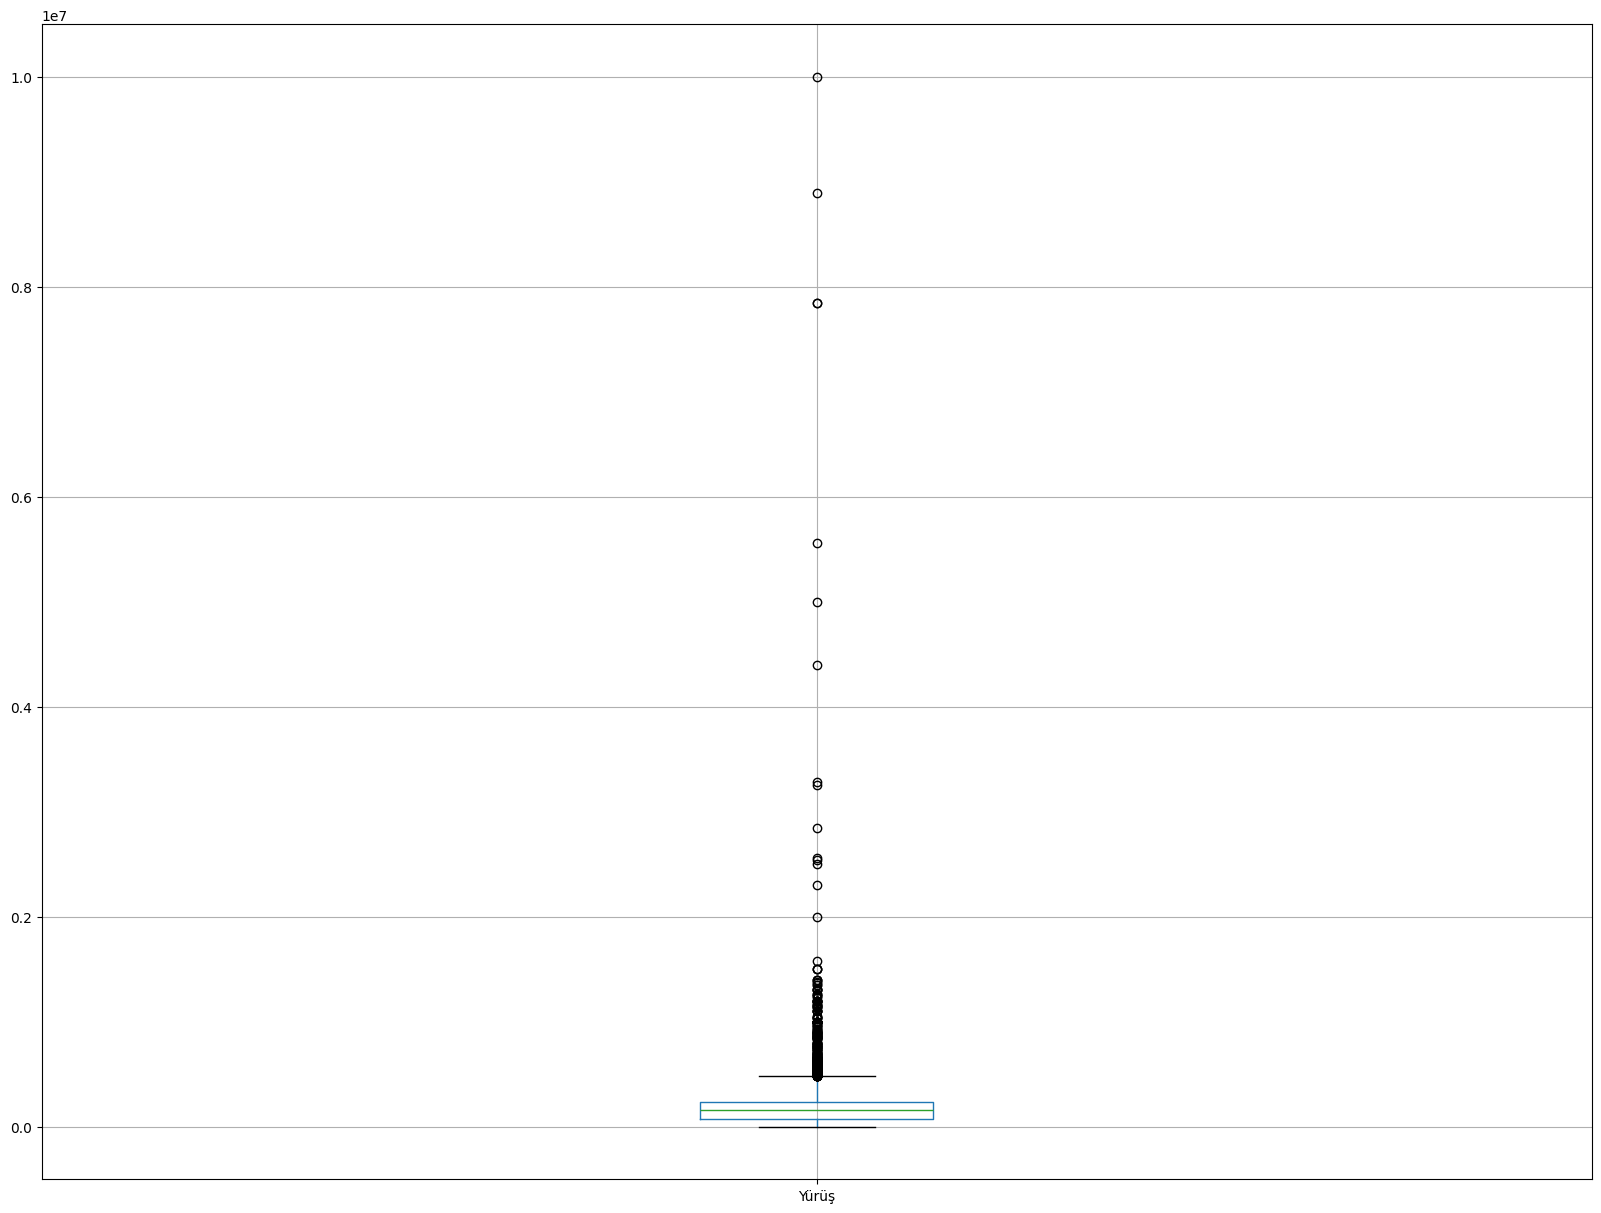

In [987]:
plt.figure(figsize=(20,15))
df['Yürüş'].to_frame().boxplot()
plt.show()

In [988]:
for i in X_train.columns:
    if i not in X_test.columns:
        print(i)

In [989]:
# X_train.columns

In [990]:
# ls= []
# for i in X_train.columns:
#     if i not in X_test.columns:
#         ls.append(i)
# print(ls)

# for i in X_test.columns:
#     if i not in X_train.columns:
#         ls.append(i)
# print(ls)
        

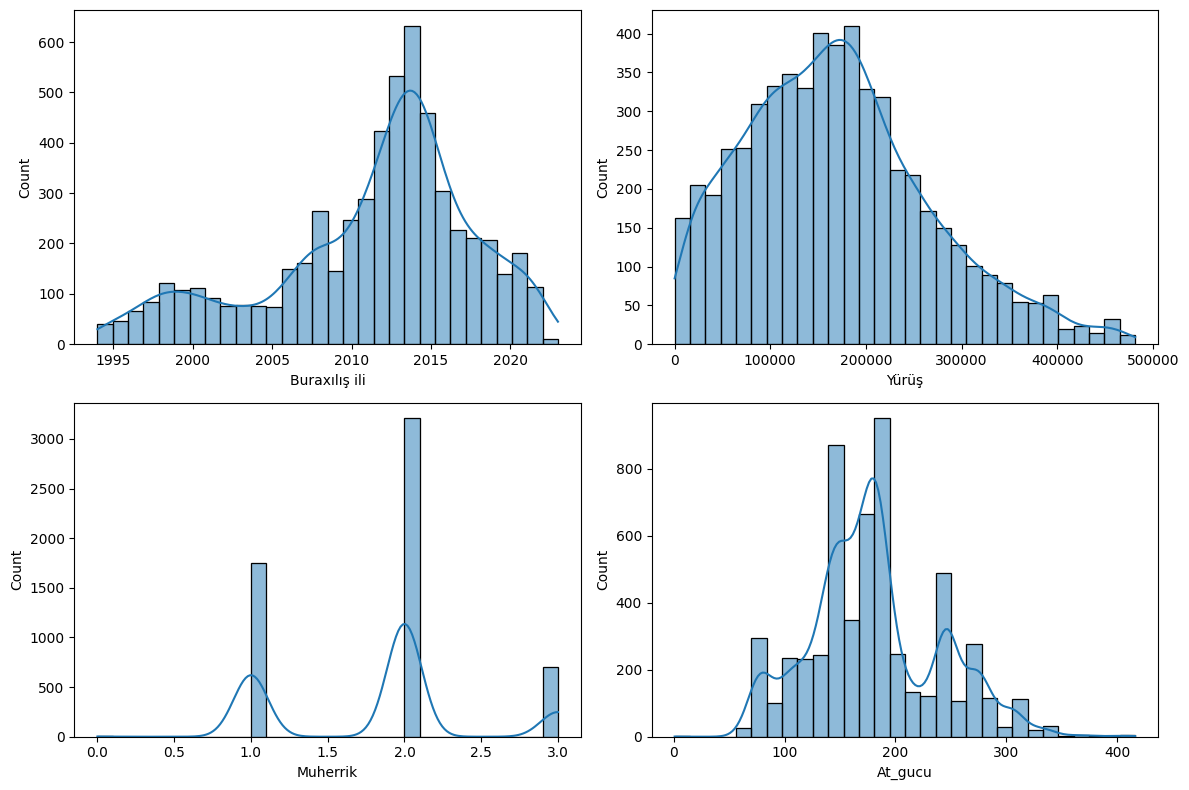

In [991]:
n = ["Buraxılış ili", "Yürüş", "Muherrik", "At_gucu"]
plt.figure(figsize=(12, 8))

for i, col in enumerate(n, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X_train[col], kde=True, bins=30)

plt.tight_layout()
plt.show()


In [992]:
# baxdimki burda normal paylanmanin hec n si yoxdu
# ona gore Min_Max

scaler = MinMaxScaler()
scaler.fit(X_train[b])
X_train[b] = scaler.transform(X_train[b])
X_test[b] = scaler.transform(X_test[b])

In [993]:
X_train

,Marka,Buraxılış ili,Yürüş,Yeni,Sahiblər,Muherrik,At_gucu,Veziyyeti,Ban növü_Dartqı,Ban növü_Furqon,...,Ban növü_Sedan,Ban növü_Universal,Ban növü_Van,Ban növü_Yük maşını,Şəhər_Salyan,Şəhər_baki_ve_etrafi,Şəhər_digər,Şəhər_qerb_bolgesi,Şəhər_simal_bolgesi,Şəhər_simal_qerb_bolgesi
10834,0.173177,0.517241,0.171157,0.0,0.333333,1.000000,0.727711,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.098490,0.689655,0.419625,0.0,0.333333,0.333333,0.337349,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11616,0.244546,0.551724,0.379926,0.0,0.333333,0.666667,0.440964,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2946,0.219110,0.655172,0.394467,0.0,0.333333,0.333333,0.334940,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6000,0.219110,0.689655,0.308882,0.0,0.333333,0.333333,0.359036,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11121,0.601687,0.758621,0.315529,0.0,0.333333,0.666667,0.440964,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11476,0.098490,0.655172,0.405684,0.0,0.666667,0.333333,0.337349,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1849,0.173177,0.931034,0.178428,0.0,0.333333,0.333333,0.269880,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16147,0.173177,0.965517,0.019514,0.0,0.333333,0.666667,0.684337,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [994]:
y_train

10834    34700.0
296      13900.0
11616    29200.0
2946     17900.0
6000     23900.0
          ...   
11121    31280.0
11476    13200.0
1849     11000.0
16147    63750.0
15450    23900.0
Name: Qiyməti, Length: 5664, dtype: float64

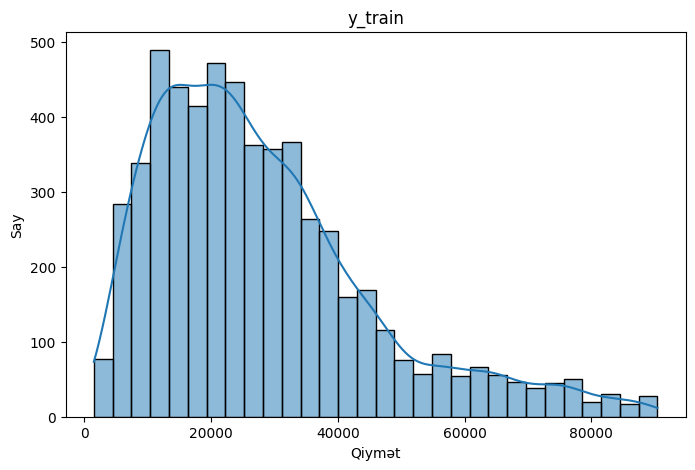

In [995]:
plt.figure(figsize=(8, 5))
sns.histplot(y_train, kde=True, bins=30)
plt.title("y_train")
plt.xlabel("Qiymət")
plt.ylabel("Say")
plt.show()


In [996]:
y_train = scaler.fit_transform(y_train.to_frame())
y_test = scaler.fit_transform(y_test.to_frame())

In [997]:
X_train.columns

Index(['Marka', 'Buraxılış ili', 'Yürüş', 'Yeni', 'Sahiblər', 'Muherrik',
       'At_gucu', 'Veziyyeti', 'Ban növü_Dartqı', 'Ban növü_Furqon',
       'Ban növü_Hetçbek', 'Ban növü_Kabriolet', 'Ban növü_Kupe',
       'Ban növü_Liftbek', 'Ban növü_Mikroavtobus', 'Ban növü_Minivan',
       'Ban növü_Moped', 'Ban növü_Motosiklet', 'Ban növü_Offroader / SUV',
       'Ban növü_Pikap', 'Ban növü_Rodster', 'Ban növü_Sedan',
       'Ban növü_Universal', 'Ban növü_Van', 'Ban növü_Yük maşını',
       'Şəhər_Salyan', 'Şəhər_baki_ve_etrafi', 'Şəhər_digər',
       'Şəhər_qerb_bolgesi', 'Şəhər_simal_bolgesi',
       'Şəhər_simal_qerb_bolgesi'],
      dtype='object')

In [998]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (5664, 31)
X_test: (2428, 31)
y_train: (5664, 1)
y_test: (2428, 1)


In [999]:
X_train

,Marka,Buraxılış ili,Yürüş,Yeni,Sahiblər,Muherrik,At_gucu,Veziyyeti,Ban növü_Dartqı,Ban növü_Furqon,...,Ban növü_Sedan,Ban növü_Universal,Ban növü_Van,Ban növü_Yük maşını,Şəhər_Salyan,Şəhər_baki_ve_etrafi,Şəhər_digər,Şəhər_qerb_bolgesi,Şəhər_simal_bolgesi,Şəhər_simal_qerb_bolgesi
10834,0.173177,0.517241,0.171157,0.0,0.333333,1.000000,0.727711,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.098490,0.689655,0.419625,0.0,0.333333,0.333333,0.337349,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11616,0.244546,0.551724,0.379926,0.0,0.333333,0.666667,0.440964,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2946,0.219110,0.655172,0.394467,0.0,0.333333,0.333333,0.334940,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6000,0.219110,0.689655,0.308882,0.0,0.333333,0.333333,0.359036,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11121,0.601687,0.758621,0.315529,0.0,0.333333,0.666667,0.440964,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11476,0.098490,0.655172,0.405684,0.0,0.666667,0.333333,0.337349,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1849,0.173177,0.931034,0.178428,0.0,0.333333,0.333333,0.269880,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16147,0.173177,0.965517,0.019514,0.0,0.333333,0.666667,0.684337,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1000]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             gamma=1,
                             max_delta_step=1,  
                             n_estimators=1000, 
                             learning_rate=0.05)

In [1001]:
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_train_pred = xgb_model.predict(X_train)

In [1002]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.054625993757289736
MSE: 0.00578566236082897
R2 Score: 0.8522617601583703


In [1007]:
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2 Score:", r2_score(y_train, y_train_pred))

Train MAE: 0.05085727023577546
Train MSE: 0.005276595338687774
Train R2 Score: 0.8665720714434096


In [1009]:
X_train.columns

Index(['Marka', 'Buraxılış ili', 'Yürüş', 'Yeni', 'Sahiblər', 'Muherrik',
       'At_gucu', 'Veziyyeti', 'Ban növü_Dartqı', 'Ban növü_Furqon',
       'Ban növü_Hetçbek', 'Ban növü_Kabriolet', 'Ban növü_Kupe',
       'Ban növü_Liftbek', 'Ban növü_Mikroavtobus', 'Ban növü_Minivan',
       'Ban növü_Moped', 'Ban növü_Motosiklet', 'Ban növü_Offroader / SUV',
       'Ban növü_Pikap', 'Ban növü_Rodster', 'Ban növü_Sedan',
       'Ban növü_Universal', 'Ban növü_Van', 'Ban növü_Yük maşını',
       'Şəhər_Salyan', 'Şəhər_baki_ve_etrafi', 'Şəhər_digər',
       'Şəhər_qerb_bolgesi', 'Şəhər_simal_bolgesi',
       'Şəhər_simal_qerb_bolgesi'],
      dtype='object')

In [1011]:
with open('model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)



In [ ]:
new_data = {
    'Marka': ['Audi'],
    'Buraxılış ili': [2015],
    'Yürüş': [120000],
    'Yeni': [1],  
    'Sahiblər': [2],
    'Muherrik': [2.4],
    'At_gucu': [150],
    'Veziyyeti': ['Vuruğu yoxdur'],
    'Ban növü': ['Sedan'],
    'Şəhər': ['Digər']
}




ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Yürüş
Feature names seen at fit time, yet now missing:
- Qiyməti
